<a href="https://colab.research.google.com/github/VozSoldat/PBL-SEMESTER-5-KEL-5/blob/main/Erril/Kelompok5_TI3E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pra-Pemrosesan Data dan Labeling

### Ambil Data Kategori 5 dan Mapping ke 25 Kelas

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:


# from pathlib import Path
# import os, shutil, sys


# # SELESAI. JANGAN RUN LAGI
# # BASE_DIR = "/content/drive/MyDrive/PBL KEL 5 SEM 5/fruits-360_100x100/fruits-360/Test"
# # OUTPUT_DIR = "/content/drive/MyDrive/PBL KEL 5 SEM 5/fruit-clean/Test"
# # ---------------------------------------------


# mapping = {
#     "Beans 1": "Beans",

#     "Cactus fruit 1": "Cactus Fruit",
#     "Cactus fruit green 1": "Cactus Fruit",
#     "Cactus fruit red 1": "Cactus Fruit",

#     "Corn Husk 1": "Corn Husk",

#     "Cucumber 1": "Cucumber",
#     "Cucumber 10": "Cucumber",
#     "Cucumber 11": "Cucumber",
#     "Cucumber 3": "Cucumber",
#     "Cucumber 4": "Cucumber",
#     "Cucumber 5": "Cucumber",
#     "Cucumber 7": "Cucumber",
#     "Cucumber 8": "Cucumber",
#     "Cucumber 9": "Cucumber",

#     "Cucumber Ripe 1": "Cucumber Ripe",
#     "Cucumber Ripe 2": "Cucumber Ripe",

#     "Eggplant 1": "Eggplant",
#     "Eggplant long 1": "Eggplant Long",

#     "Pepino 1": "Pepino",

#     "Pepper Green 1": "Pepper Green",
#     "Pepper Orange 1": "Pepper Orange",
#     "Pepper Red 1": "Pepper Red",
#     "Pepper Yellow 1": "Pepper Yellow",

#     "Pitahaya Red 1": "Pitahaya Red",
#     "Tamarillo 1": "Tamarillo",

#     "Tomato 1": "Tomato",
#     "Tomato 10": "Tomato",
#     "Tomato 2": "Tomato",
#     "Tomato 3": "Tomato",
#     "Tomato 4": "Tomato",
#     "Tomato 5": "Tomato",
#     "Tomato 7": "Tomato",
#     "Tomato 8": "Tomato",
#     "Tomato 9": "Tomato",

#     "Tomato Cherry Maroon 1": "Tomato Cherry Maroon",
#     "Tomato Cherry Orange 1": "Tomato Cherry Orange",
#     "Tomato Cherry Red 1": "Tomato Cherry Red",
#     "Tomato Cherry Red 2": "Tomato Cherry Red",
#     "Tomato Cherry Yellow 1": "Tomato Cherry Yellow",

#     "Tomato Heart 1": "Tomato Heart",

#     "Tomato Maroon 1": "Tomato Maroon",
#     "Tomato Maroon 2": "Tomato Maroon",

#     "Tomato not Ripen 1": "Tomato Not Ripe",
#     "Tomato Yellow 1": "Tomato Yellow",

#     "Zucchini 1": "Zucchini",
#     "Zucchini dark 1": "Zucchini Dark"
# }

# # Allowed image extensions
# image_exts = {".jpg", ".jpeg", ".png", ".bmp", ".webp", ".tif", ".tiff"}

# # ---------- Validasi paths ----------
# if not os.path.isdir(BASE_DIR):
#     print("ERROR: BASE_DIR tidak ditemukan:", BASE_DIR)
#     print("Pastikan kamu sudah mount Drive (jika pakai Drive) atau upload folder ke sesi Colab.")
#     print("Contoh langkah singkat untuk Drive:")
#     print("  from google.colab import drive")
#     print("  drive.mount('/content/drive')")
#     print("Lalu set BASE_DIR = '/content/drive/MyDrive/path_ke_folder_lama'")
#     raise SystemExit(1)

# os.makedirs(OUTPUT_DIR, exist_ok=True)

# # ---------- Proses copy ----------
# copied_count = 0
# missing_folders = []
# skipped_nonimage = 0

# for src_folder_name, target_category in mapping.items():
#     src_folder_path = os.path.join(BASE_DIR, src_folder_name)
#     if not os.path.isdir(src_folder_path):
#         missing_folders.append(src_folder_name)
#         print(f"[MISSING] Source folder not found: {src_folder_name}")
#         continue

#     target_dir = os.path.join(OUTPUT_DIR, target_category)
#     os.makedirs(target_dir, exist_ok=True)

#     for root, dirs, files in os.walk(src_folder_path):
#         for fname in files:
#             ext = Path(fname).suffix.lower()
#             if ext in image_exts:
#                 src_path = os.path.join(root, fname)
#                 rel_root = os.path.relpath(root, src_folder_path)
#                 if rel_root == ".":
#                     rel_root = ""
#                 else:
#                     rel_root = rel_root.replace(os.sep, "_")
#                 safe_folder_token = src_folder_name.replace(" ", "_")
#                 if rel_root:
#                     dst_fname = f"{safe_folder_token}__{rel_root}__{fname}"
#                 else:
#                     dst_fname = f"{safe_folder_token}__{fname}"
#                 dst_path = os.path.join(target_dir, dst_fname)
#                 base, ext0 = os.path.splitext(dst_path)
#                 counter = 1
#                 while os.path.exists(dst_path):
#                     dst_path = f"{base}__{counter}{ext0}"
#                     counter += 1
#                 shutil.copy2(src_path, dst_path)
#                 copied_count += 1
#                 print(f"[COPY] {src_path} -> {dst_path}")
#             else:
#                 skipped_nonimage += 1

# # ---------- Ringkasan ----------
# print("\n=== SUMMARY ===")
# print(f"Total images copied: {copied_count}")
# print(f"Non-image files skipped (counted): {skipped_nonimage}")
# if missing_folders:
#     print("\nFolders listed in mapping but MISSING from BASE_DIR:")
#     for m in missing_folders:
#         print(" -", m)
# print(f"\nOrganized dataset is at: {OUTPUT_DIR}")


#### Ambil Citra

In [ ]:
import os
import cv2

root = "/content/drive/MyDrive/PBL KEL 5 SEM 5/fruit-clean/Training"
X_train = []
y_train = []

for class_name in os.listdir(root):
    class_folder = os.path.join(root, class_name)
    if not os.path.isdir(class_folder):
        continue

    for file in os.listdir(class_folder):
        img = cv2.imread(os.path.join(class_folder, file))
        img = cv2.resize(img, (128, 128))

        X_train.append(img)
        y_train.append(class_name)


### Normalisasi Data

In [ ]:
import numpy as np

X_train = np.array(X_train).astype(np.float32) / 255.0

## Ekstraksi Fitur

#### Local Binary Patterns

In [ ]:
import cv2
import numpy as np
from skimage.feature import local_binary_pattern

def extract_lbp(image, P=8, R=1, method='uniform'):

    # pastikan grayscale
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # hitung LBP
    lbp = local_binary_pattern(image, P, R, method)

    # jumlah pola uniform = P + 2
    bins = int(P + 2)

    # histogram sebagai fitur
    hist, _ = np.histogram(lbp.ravel(),
                           bins=bins,
                           range=(0, bins),
                           density=True)

    return hist  # hasil 1D vector


#### Histogram Warna

In [ ]:
def extract_color_hist(img):
    hsv = cv2.cvtColor((img * 255).astype("uint8"), cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0,1,2], None,
                        [8,8,8],
                        [0,180,0,256,0,256])
    return hist.flatten()


#### Gabungan

In [ ]:
X_train_features = []

for img in X_train:
    lbp = extract_lbp(img)
    c = extract_color_hist(img)
    features = np.concatenate([lbp, c])
    X_train_features.append(features)

X_train_features = np.array(X_train_features)


/usr/local/lib/python3.12/dist-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


In [ ]:
print(X_train_features.shape)

(23009, 522)


## Mengambil Data Test dan Ekstraksi Fiturnya

### Ambil data

In [ ]:
import os
import cv2

root = "/content/drive/MyDrive/PBL KEL 5 SEM 5/fruit-clean/Test"
X_test = []
y_test = []

for class_name in os.listdir(root):
    class_folder = os.path.join(root, class_name)
    if not os.path.isdir(class_folder):
        continue

    for file in os.listdir(class_folder):
        img = cv2.imread(os.path.join(class_folder, file))
        img = cv2.resize(img, (128, 128))

        X_test.append(img)
        y_test.append(class_name)


### Normalisasi

In [ ]:
import numpy as np

X_test = np.array(X_test).astype(np.float32) / 255.0

### Ekstraksi fitur

In [ ]:
X_test_features = []

for img in X_test:
    lbp = extract_lbp(img)
    c = extract_color_hist(img)
    features = np.concatenate([lbp, c])
    X_test_features.append(features)

X_test_features = np.array(X_test_features)

## Reduksi Dimensi PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_features)
X_test_pca  = pca.transform(X_test_features)

## Model

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=10, gamma='scale')
svm_model.fit(X_train_pca, y_train)


SVC(C=10)

### Simpan

In [ ]:
import joblib

joblib.dump(svm_model, "svm_model.pkl")


['svm_model.pkl']

## Evaluasi

### Buat Prediksi

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = svm_model.predict(X_test_pca)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9879926912033412


### Hitung Akurasi, Precision, Recall, F1

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro')

precision_weighted = precision_score(y_test, y_pred, average='weighted')
recall_weighted = recall_score(y_test, y_pred, average='weighted')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision (macro):", precision_macro)
print("Recall (macro):", recall_macro)
print("F1-score (macro):", f1_macro)

print("\nPrecision (weighted):", precision_weighted)
print("Recall (weighted):", recall_weighted)
print("F1-score (weighted):", f1_weighted)


Accuracy: 0.9879926912033412
Precision (macro): 0.9949116478086708
Recall (macro): 0.9768065268065268
F1-score (macro): 0.9837129343880698

Precision (weighted): 0.9887679510345176
Recall (weighted): 0.9879926912033412
F1-score (weighted): 0.9871565667780549


### Confusion Matrix

In [ ]:
class_names = [
    "Beans",
    "Cactus Fruit",
    "Corn Husk",
    "Cucumber",
    "Cucumber Ripe",
    "Eggplant",
    "Pepino",
    "Eggplant Long",
    "Pepper Green",
    "Pepper Orange",
    "Pepper Red",
    "Pepper Yellow",
    "Pitahaya Red",
    "Tamarillo",
    "Tomato",
    "Tomato Cherry Maroon",
    "Tomato Cherry Orange",
    "Tomato Cherry Red",
    "Tomato Cherry Yellow",
    "Tomato Heart",
    "Tomato Maroon",
    "Tomato Not Ripe",
    "Tomato Yellow",
    "Zucchini",
    "Zucchini Dark"
]


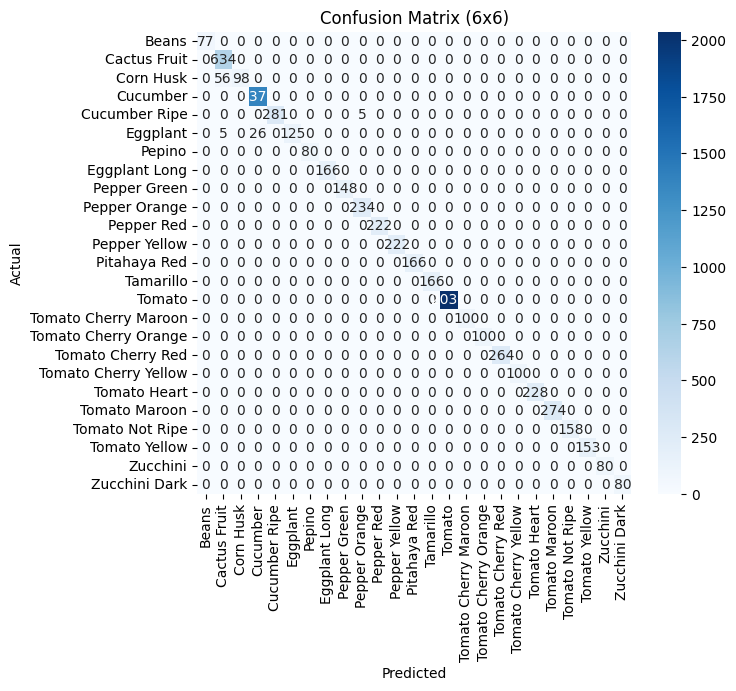

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (6x6)")
plt.show()


## Grafik performansi model

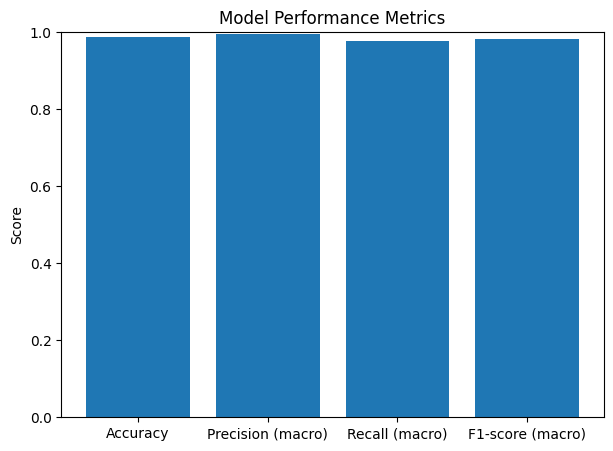

In [ ]:
metrics = ["Accuracy", "Precision (macro)", "Recall (macro)", "F1-score (macro)"]
values = [accuracy, precision_macro, recall_macro, f1_macro]

plt.figure(figsize=(7, 5))
plt.bar(metrics, values)
plt.ylim(0, 1)
plt.title("Model Performance Metrics")
plt.ylabel("Score")
plt.show()
